In [15]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
#N_list = [2** (2 + i) for i in range(1,13)]

# Import data for regular
N_list = [500, 1000, 2000, 4000]
N_weak = [500,500,500, 500]
N_strong = [4000, 2000, 1000, 500]

size_weak = [1, 2, 4, 8]
size_strong = [1, 2, 4, 8]

print(N_list)
epoch_list = [30000]
seed_list = np.arange(1234, 1242)
epochs = epoch_list[0]
seed_list = [1234, 1235,1236, 1237, 1238, 1239, 1240, 1241]

def read_dict(name):
    my_dict = np.load(name + '.npy', allow_pickle = True)

    texec = my_dict.item().get('texec')
    train = my_dict.item().get('train')
    test = my_dict.item().get('test')
    metrics_u = my_dict.item().get('metrics_u')
    metrics_v = my_dict.item().get('metrics_v')
    metrics_p = my_dict.item().get('metrics_p')
    lambda_1 = my_dict.item().get('lambda_1').ravel()
    lambda_2 = my_dict.item().get('lambda_2').ravel()
    err = 1/2* (metrics_u[-1] + metrics_v[-1])
    

    times = my_dict.item().get('times')
    pointsec = my_dict.item().get('pointsec')

    n = times.shape[0]

    res1 = pd.DataFrame({
            'N': n * [N],
            'seed': n * [seed],
            'train': train,
            'test': test,
            'metrics_u': metrics_u,
            'metrics_v': metrics_v,
            'metrics_p': metrics_p,
            'metrics': err,
            'lambda_1': lambda_1,
            'lambda_2': lambda_2,
            'times': times,
            'iteration' : np.arange(n) * 500,
            'pointsec': pointsec})    
        
    res2 = pd.DataFrame({
        'scaling': [0],
        'N': [N],
        'seed': [seed],
        'err': [err],
        'texec': [texec],
        'pointsec': [np.mean(pointsec)]
    })
    
    return res1, res2
    
df = pd.DataFrame(columns = ['train', 'test', 'metrics', 'times'])    
df_summary = pd.DataFrame(columns = ['err', 'texec'])
precision_list = []

for i in range(len(N_list)):
    N = N_list[i]
    Nw = N_weak[i]
    Ns = N_strong[i]
    sw = size_weak[i]
    sn = size_weak[i]
    ss = size_strong[i]
    print(N)
    #precision_list.append(N / 8)
    for seed in seed_list:
                    
        scaling = 'none'    
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(N) + '_epochs' + str(epochs) + '_size1'
        df1, df2 = read_dict(name)   
        n = df1.shape[0]
        df2['scaling'] = [scaling]
        df2['size'] = [sn]
        df2['pointsectot'] = df2['pointsec']
        df1['scaling'] = n * [scaling]
        df_summary = pd.concat([df_summary,df2])
        df = pd.concat([df, df1])
        
        eff1 = df2['pointsec']
        
        scaling = 'strong'
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(Ns) + '_epochs' + str(epochs) + '_size' + str(ss)
        df1, df2 = read_dict(name)    
        n = df1.shape[0]
        df2['scaling'] = [scaling]
        df2['size'] = [ss]
        df2['pointsectot'] = ss * df2['pointsec']
        df1['scaling'] = n * [scaling]
        
        effw = df2['pointsec'] / eff1
        #if seed == 1234:
        #    print(Ns, ss, scaling)
        
        df_summary = pd.concat([df_summary,df2])
        df = pd.concat([df, df1])
        
        scaling = 'weak'
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(Nw) + '_epochs' + str(epochs) + '_size' + str(sw)
        df1, df2 = read_dict(name)    
        n = df1.shape[0]
        df2['scaling'] = [scaling]
        df2['pointsectot'] = sw * df2['pointsec']
        df1['scaling'] = n *[scaling]
        df2['size'] = [sw]
        
        df_summary = pd.concat([df_summary,df2])
        df = pd.concat([df, df1])
        
        #if seed == 1234:
        #    print(Ns, ss, scaling, 'adasum')
        
        
df_summary = df_summary.reset_index(drop=True)
df_summary['N'] = df_summary['N'].astype(int).astype("category")
df_summary['size'] = df_summary['size'].astype(int).astype("category")
df_summary['seed'] = df_summary['seed'].astype("category")

df_summary['err_log'] = np.log10(df_summary['err'])
df_summary['pointsec_log'] = np.log10(df_summary['pointsec'])
df_summary['pointsectot_log'] = np.log10(df_summary['pointsectot'])
df_summary['scaling'] = df_summary['scaling'].astype('category')
df['iteration'] = df['iteration'].astype(int)


[500, 1000, 2000, 4000]
500
1000
2000
4000


In [25]:
rgb = [(236, 0, 84), (254, 64, 18), (38, 174, 65), (44, 95, 177)]
rgb = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in rgb]
pink = rgb[0]
orange = rgb[1]
green = rgb[2]
blue = rgb[3]

cmap_neo = sns.color_palette([orange,blue,green], n_colors=3)

colors = [pink, pink, pink,
          blue, blue, blue, blue,
         green, green, green, green, green, green, green, green, green, green]
my_palette = sns.color_palette(colors, n_colors=16)
my_palette
cmap = sns.color_palette([pink, blue, green, orange], n_colors=4)
cmap_r = sns.color_palette([orange, green, blue, pink], n_colors=4)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


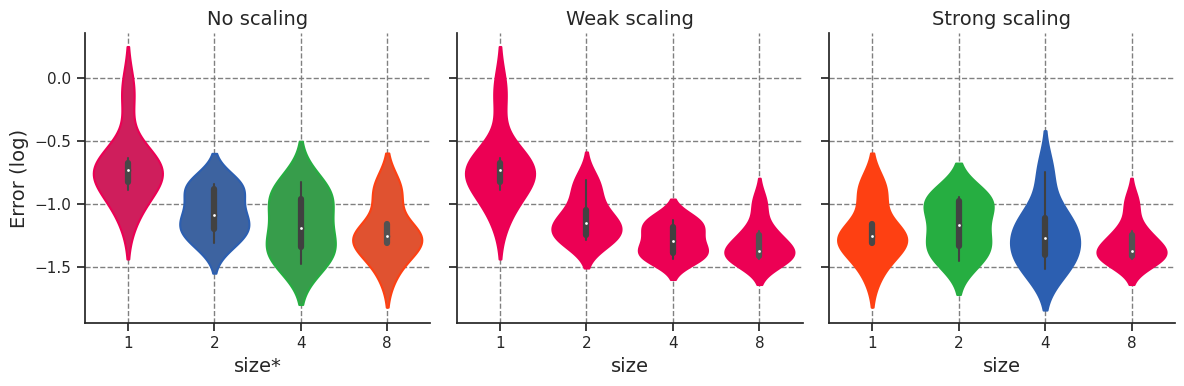

In [27]:
sns.set(style="ticks")
g = sns.FacetGrid(df_summary, hue='N', col='scaling', col_order=['none','weak','strong'], palette=cmap, height=4)
g.map(sns.violinplot, 'size',"err_log")

titles = ['No scaling', 'Weak scaling', 'Strong scaling']
ll = 0
for ax in g.axes.flatten():
    ax.grid(linestyle='--', color='grey')
    for i in range(4):
        ax.collections[2*i].set_edgecolor(cmap[i])
    ax.set_title(titles[ll], fontsize=14)
    if ll == 1:
        for i in range(4):
            ax.collections[2*i].set_color(pink)

    if ll == 2:
        for i in range(4):
            ax.collections[2*i].set_color(cmap_r[i])

    ll += 1

ax1, ax2, ax3 = g.axes.flatten()
g.set_xlabels('size', fontsize=14)
g.set_ylabels('Error (log)', fontsize=14)
ax1.set_xlabel('size*', fontsize=14)

plt.savefig('plots/hAnalisisNavierStokes.pdf')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


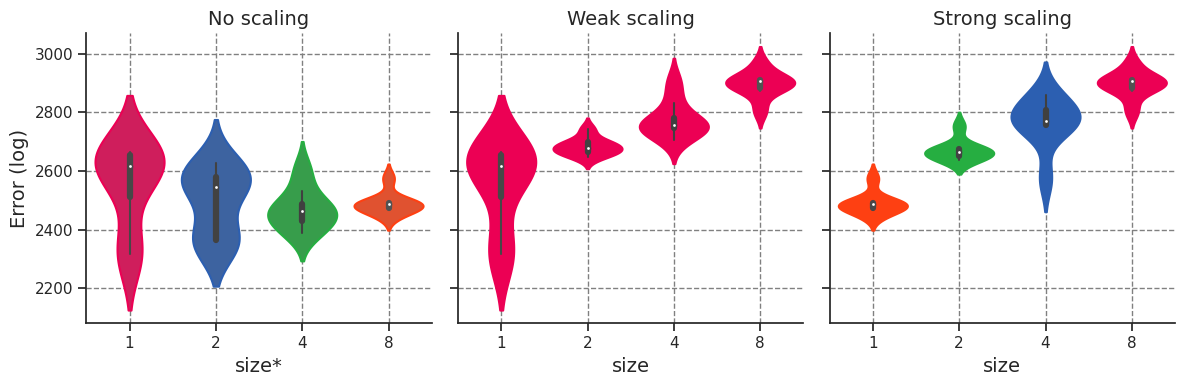

In [28]:
sns.set(style="ticks")
g = sns.FacetGrid(df_summary, hue='N', col='scaling', col_order=['none','weak','strong'], palette=cmap, height=4)
g.map(sns.violinplot, 'size',"texec")

titles = ['No scaling', 'Weak scaling', 'Strong scaling']
ll = 0
for ax in g.axes.flatten():
    ax.grid(linestyle='--', color='grey')
    for i in range(4):
        ax.collections[2*i].set_edgecolor(cmap[i])
    ax.set_title(titles[ll], fontsize=14)
    if ll == 1:
        for i in range(4):
            ax.collections[2*i].set_color(pink)

    if ll == 2:
        for i in range(4):
            ax.collections[2*i].set_color(cmap_r[i])

    ll += 1

ax1, ax2, ax3 = g.axes.flatten()
g.set_xlabels('size', fontsize=14)
g.set_ylabels('Error (log)', fontsize=14)
ax1.set_xlabel('size*', fontsize=14)

plt.savefig('plots/tAnalisisNavier.pdf')

In [29]:
df_summary.groupby(['N', 'size'])['texec'].mean()

N     size
500   1       2532.663961
      2               NaN
      4               NaN
      8               NaN
1000  1               NaN
      2       2616.780281
      4               NaN
      8               NaN
2000  1               NaN
      2               NaN
      4       2670.964788
      8               NaN
4000  1               NaN
      2               NaN
      4               NaN
      8       2760.178013
Name: texec, dtype: float64

In [30]:
df_summary.groupby(['scaling', 'size']).mean()['pointsec']

/tmp/ipykernel_8445/210782856.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summary.groupby(['scaling', 'size']).mean()['pointsec']


scaling  size
none     1        6283.711457
         2       12888.438912
         4       25979.287702
         8       51574.404292
strong   1       51574.404292
         2       24029.493995
         4       11664.667166
         8        5564.001730
weak     1        6283.711457
         2        6007.571442
         4        5804.563935
         8        5564.001730
Name: pointsec, dtype: float64

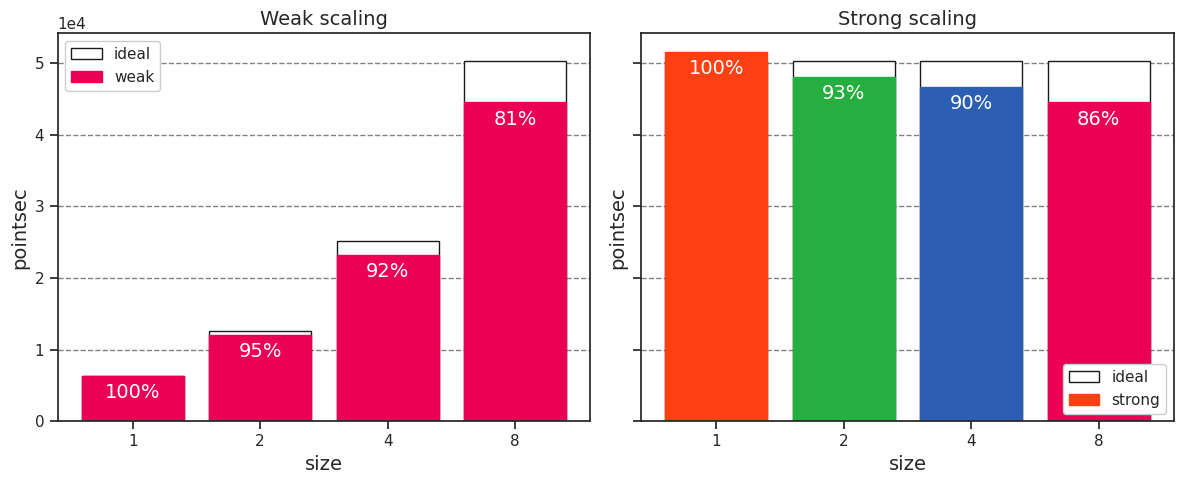

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)

#Weak
size = [1,2,4,8]
none = np.array([6283 * size[i] for i in range(4)])

weak_N0 = np.array([6283,
                   6007 * 2,
                    5804 * 4,
                    5564 * 8
                   ])

weak_eff_N0 = np.array([100,
                 6007 / 6283 * 100,
                 5804 / 6283 * 100,
                 5564 / 6823 * 100])

size = np.array([1,2,3,4])
ax1.grid(linestyle='--', color='grey', axis= 'y')

ax1.set_xticks(ticks=[1,2,3,4], labels=['1','2','4','8' ])
ax1.bar(size, none, color = 'white', edgecolor='k', label='ideal')
ax1.bar(size, weak_N0, color = pink, edgecolor=pink, label='weak')

ax1.set_ylabel('pointsec', fontsize=14)
ax1.set_xlabel('size', fontsize=14)
ax1.set_title('Weak scaling', fontsize=14)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

ax1.legend(framealpha=1)

#Strong

#strong   1       51574.404292
#         2       24029.493995
#         4       11664.667166
#         8        5564.001730
size = [1,2,4,8]


none = np.array([6283 * 8 for i in range(4)])

strong_N0 = np.array([51574,
                   24029 * 2,
                    11664 * 4,
                    5564 * 8
                   ])

strong_eff_N0 = strong_N0 / strong_N0[0] * 100

size = np.array([1,2,3,4])
ax2.grid(linestyle='--', color='grey', axis= 'y')

ax2.set_xticks(ticks=[1,2,3,4], labels=['1','2','4','8' ])
ax2.bar(size, none, color = 'white', edgecolor='k', label='ideal')
ax2.bar(size, strong_N0, color = cmap_r, edgecolor=cmap_r, label='strong')

ax2.set_ylabel('pointsec', fontsize=14)
ax2.set_xlabel('size', fontsize=14)
ax2.set_title('Strong scaling', fontsize=14)

ax2.legend(loc = 'lower right', framealpha=1)

fig.tight_layout()


weak_eff_N0 = weak_eff_N0.astype(int).astype('str')
strong_eff_N0 = strong_eff_N0.astype(int).astype('str')

for i in range(weak_eff_N0.shape[0]):
    tt = weak_eff_N0[i]
    ax1.text(size[i], weak_N0[i]-1000, tt + '%', horizontalalignment='center',
        verticalalignment='top', color = 'white',fontsize=14)

for i in range(strong_eff_N0.shape[0]):
    tt = strong_eff_N0[i]
    ax2.text(size[i], strong_N0[i]-1000, tt + '%', horizontalalignment='center',
        verticalalignment='top', color = 'white',fontsize=14)    
    
plt.savefig('plots/NavierStokesEfficiency.pdf')    
